# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
#!pip install citipy

In [194]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import json
from datetime import datetime as dt
import scipy.stats as st
from scipy.stats import linregress

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [195]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [196]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#print(url)

In [197]:
# Create empty lists to append the API data into lists 
city_name = []
temps = []
humid = []
cloudiness = []
wind_speed = []
lats = []
longs = []
country=[]
date=[]

# Start the call counter 
counter = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    
    response = requests.get(f"{url}&q={city}").json()
    try: 
        city_name.append(response["name"])
        temps.append(response["main"]["temp_max"])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {counter} | {city}")
        #print(f"{url}&q={city}")
        
        # Increase counter by one 
        counter = counter + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | leningradskiy
Processing Record 2 | kapaa
Processing Record 3 | port alfred
City not found. Skipping...
Processing Record 4 | taltal
Processing Record 5 | ponta do sol
Processing Record 6 | jega
Processing Record 7 | upernavik
Processing Record 8 | rikitea
Processing Record 9 | butaritari
Processing Record 10 | aksarka
Processing Record 11 | bengkulu
Processing Record 12 | torbay
City not found. Skipping...
Processing Record 13 | mataura
Processing Record 14 | ribeira grande
Processing Record 15 | vardo
Processing Record 16 | barrow
Processing Record 17 | hobart
Processing Record 18 | sao joao da barra
Processing Record 19 | bredasdorp
Processing Record 20 | punta arenas
City not found. Skipping...
Processing Record 21 | ocampo
Processing Record 22 | ushuaia
City not found. Skipping...
Processing Record 23 | kabompo
City not found. Skipping...
Processin

Processing Record 227 | havelock
Processing Record 228 | haines junction
Processing Record 229 | caravelas
Processing Record 230 | kapit
Processing Record 231 | kalmunai
Processing Record 232 | tura
Processing Record 233 | lasem
Processing Record 234 | north bend
Processing Record 235 | sioux falls
Processing Record 236 | hofn
Processing Record 237 | zhigansk
Processing Record 238 | kayerkan
Processing Record 239 | shibetsu
Processing Record 240 | bac lieu
Processing Record 241 | ettingen
Processing Record 242 | opuwo
Processing Record 243 | zhangzhou
Processing Record 244 | pozo colorado
Processing Record 245 | grand gaube
Processing Record 246 | matara
Processing Record 247 | kaeo
Processing Record 248 | vila franca do campo
Processing Record 249 | nyurba
Processing Record 250 | airai
City not found. Skipping...
Processing Record 251 | severobaykalsk
Processing Record 252 | bubaque
Processing Record 253 | novikovo
Processing Record 254 | ancud
Processing Record 255 | fecamp
Processin

Processing Record 459 | maceio
Processing Record 460 | unity
Processing Record 461 | cairns
Processing Record 462 | quetigny
Processing Record 463 | mpika
Processing Record 464 | okhotsk
Processing Record 465 | nelson bay
Processing Record 466 | ahipara
Processing Record 467 | san pedro de macoris
Processing Record 468 | kiruna
Processing Record 469 | tefe
Processing Record 470 | zapotitlan
Processing Record 471 | sidi ali
Processing Record 472 | marsh harbour
Processing Record 473 | rokytne
Processing Record 474 | severo-yeniseyskiy
Processing Record 475 | segou
Processing Record 476 | duku
Processing Record 477 | bayan
Processing Record 478 | vondrozo
Processing Record 479 | kamogata
Processing Record 480 | iquique
Processing Record 481 | ayorou
Processing Record 482 | petropavlovsk-kamchatskiy
Processing Record 483 | ponezhukay
Processing Record 484 | tyukhtet
Processing Record 485 | ilhabela
Processing Record 486 | luba
Processing Record 487 | hefei
Processing Record 488 | mehamn
P

### Converting Raw Data to DataFrame
* Exporting the city data into a .csv.
* Displaying the DataFrame

In [198]:
#create dataframe
city_weather_df = pd.DataFrame({
    "City" : city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Latitude": lats,
    "Longitude" :longs,
    "Max Temp": temps,
    "Wind Speed": wind_speed,
})
city_weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Latitude      555
Longitude     555
Max Temp      555
Wind Speed    555
dtype: int64

In [199]:
# save it to CSV file
city_weather_df.to_csv("data/CityData.csv")

# Display data frame head 
city_weather_df.head(10)

City  Cloudiness Country        Date  Humidity  Latitude  \
0  Leningradskiy         100      RU  1605046506        96     69.38   
1          Kapaa          40      US  1605046349        74     22.08   
2    Port Alfred          94      ZA  1605046509        77    -33.59   
3         Taltal          25      CL  1605046220        67    -25.40   
4   Ponta do Sol          75      PT  1605046512        72     32.67   
5           Jega          31      NG  1605046513        26     12.22   
6      Upernavik         100      GL  1605046515        90     72.79   
7        Rikitea           0      PF  1605046517        79    -23.12   
8     Butaritari          36      KI  1605046518        78      3.07   
9        Aksarka          62      RU  1605046520        93     66.56   

   Longitude  Max Temp  Wind Speed  
0     178.42     24.84       17.60  
1    -159.32     82.40       18.34  
2      26.89     60.21        7.31  
3     -70.48     62.13        5.08  
4     -17.10     68.00        2.24  
5       4.38     78.04        8.08  
6     -56.15     10.53        5.57  
7    -134.97     74.07       17.98  
8     172.79     82.04        8.77  
9      67.80      7.56        5.55

In [200]:
# Calculate current date from datetime library
current_date = dt.now().strftime("(%m/%d/%Y)")
print(current_date)

(11/10/2020)


### Plotting the Data
* Used proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Saved the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

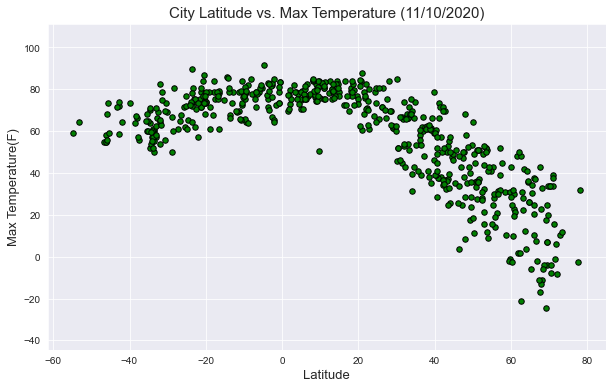

In [201]:
# Create a scatter plot Latitude vs Max Temp
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temp"], marker="o",s=30,facecolors="green",edgecolor = "black", alpha=1)

# Incorporate the graph properties
plt.title("City Latitude vs. Max Temperature" + " " + current_date,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Max Temperature(F)",fontsize = 13)
sns.set_style('darkgrid')
plt.ylim(min(city_weather_df["Max Temp"])-20, max(city_weather_df["Max Temp"])+20)
plt.grid(True)

#save the figure
plt.savefig("Images/Temperature_in_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0),however when you go farther from the equator towrads to the north and south the temprature will decrease.

#### Latitude vs. Humidity Plot

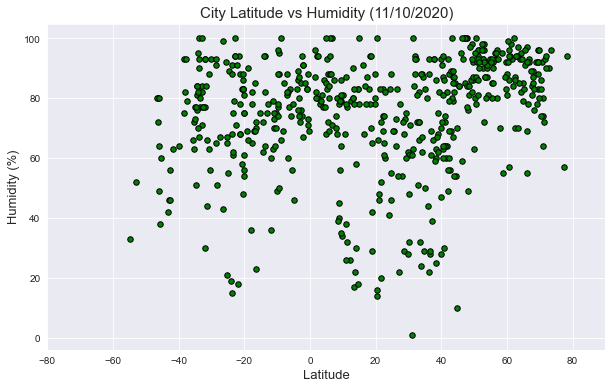

In [202]:
# Create a scatter plot of Humidity vs latitude
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"], marker="o",s=30, facecolors="green",edgecolor = "black", alpha=1)

# Incorporate the graph properties
plt.title("City Latitude vs Humidity" + " " + current_date,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Humidity (%)",fontsize = 13)
plt.xlim(-80, 90)
plt.grid(True)
sns.set_style('darkgrid')

#save the figure
plt.savefig("Images/Humidity_in_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot displayed the relationship between Humidity (%) vs. Latitude. From the result we can infer that humidity is fairly distributed troughout the plot, so we can say that high humidity occer for both cities found farther or near to the equator.

#### Latitude vs. Cloudiness Plot

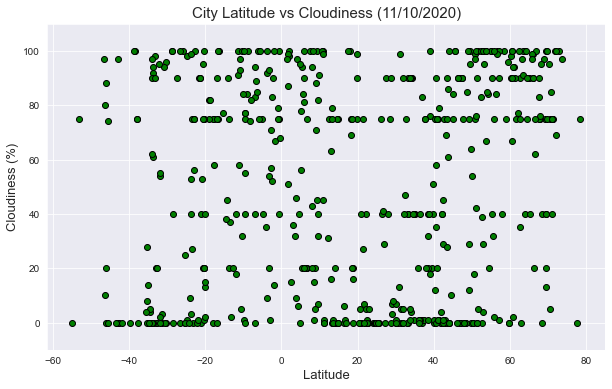

In [203]:
# Create a scatter plot of Latitude Vs Cloudiness
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"], marker="o", facecolors="green", edgecolor = "black", alpha=1)

# Incorporate the graph properties
plt.title("City Latitude vs Cloudiness" + " " + current_date ,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Cloudiness (%)",fontsize = 13)
plt.ylim(min(city_weather_df["Cloudiness"])-10, max(city_weather_df["Cloudiness"])+10)
plt.grid(True)
sns.set_style('darkgrid')

#save the figure
plt.savefig("Images/Cloudiness_In_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot showed the relationship between the cities cloudness, and latitude. From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater(Latitude 0).

#### Latitude vs. Wind Speed Plot

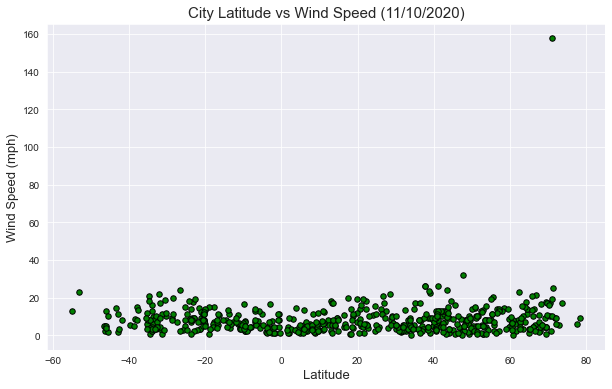

In [204]:
# Create a scatter plot of latitude vs wind speed
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"],marker="o",s=30, facecolors="green", edgecolor = "black", alpha=1)

# Incorporate the graph properties
plt.title("City Latitude vs Wind Speed" + " " + current_date,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Wind Speed (mph)",fontsize = 13)
plt.grid(True)
sns.set_style('darkgrid')

#save the figure
plt.savefig("Images/Wind_Speed_In_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot showed the relationship between wind speed (mph), and latitude. The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increases for the cities farther from the equator (Latitude 60).

In [244]:
#Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    plt.scatter(x_values,y_values,color = 'purple',edgecolor = "black",alpha = 0.80, linewidths = 1)

# Add labels and title to plot
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} Linear Regression {current_date}",fontsize = 16)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    plt.grid(True)

# Annotate linear regression
    plt.annotate(line_eq,(10, 50),fontsize=20,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction', horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-30, 60),fontsize=20,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-40, 10),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
# Print correlation and r square value
    print(f"The correlation between both factors is : {round(st.pearsonr(x_values, y_values)[0],2)}")
    print(f"The r-squared is: {round(rvalue**2,3)}")

    return plt.plot(x_values,regress_values,"r-")

In [245]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
southern_hemisphere = city_weather_df.loc[city_weather_df["Latitude"] < 0]

#### Northern Hemisphere - Max Temp(F) vs. Latitude Linear Regression

The correlation between both factors is : -0.85
The r-squared is: 0.73


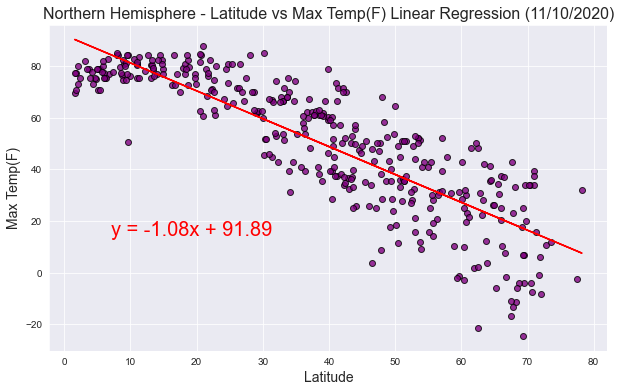

In [210]:
#linear regression model for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temp']

createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp(F)","Northern",(0, 0))

plt.savefig("Images/Northern_Hemisphere_Max_Temp_vs._Latitude_Linear_Regression.png", bbox_inches = "tight")
plt.show()

#### The above scattered graph is a linear regression model between Maximum Temperature and Latitude for Northern Hemisphere cities. The result from the data showed that there is a strong negative correlation between Maximum Temperature and Latitude which means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.

#### Southern Hemisphere - Max Temp(F) vs. Latitude Linear Regression

The correlation between both factors is : 0.62
The r-squared is: 0.384


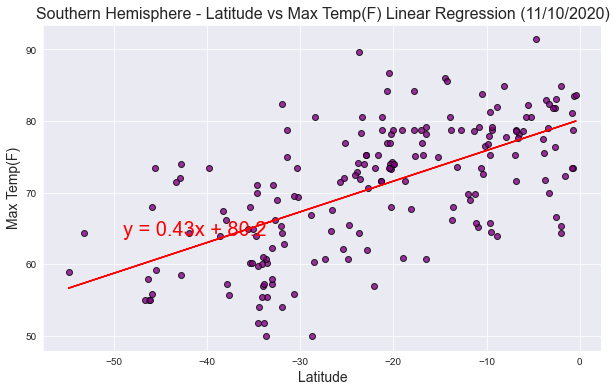

In [246]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temp']

createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp(F)", "Southern",(-30, 60))

plt.savefig("Images/Southern_Hemisphere_Max_Temp_vs._Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

#### The above scattered graph is a linear regression model between Maximum Temperature and Latitude for Southern Hemisphere cities. The result from the data showed that there is a moderate positive correlation between latitude and max temperature for southern hemisphere.

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is : 0.31
The r-squared is: 0.096


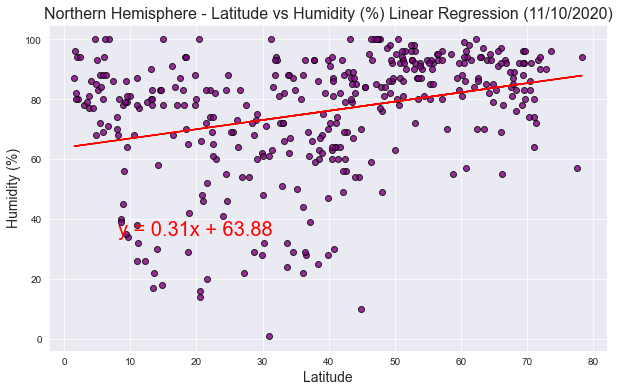

In [237]:
# Create a scatter plot for latitude vs humidity (northern hemisphere)
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']

createLinearRegressionPlot(x_values, y_values,"Latitude", "Humidity (%)", "Northern",(40, 20))

plt.savefig("Images/Northern_Hemisphere_Humidity_vs._Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

#### The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The result from the data showed that there is a moderate positive correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.¶

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is : 0.05
The r-squared is: 0.0


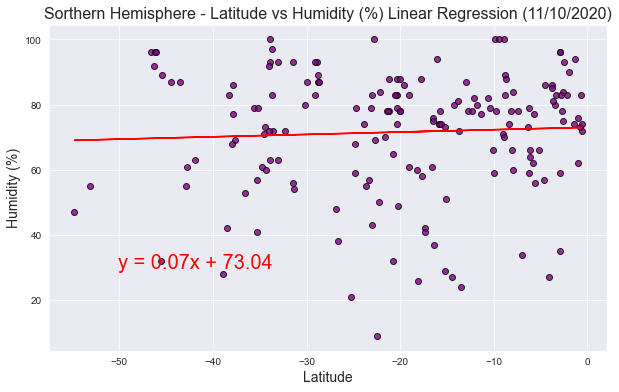

In [147]:
# Create a scatter plot for latitude vs humidity (southern hemisphere)
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']

createLinearRegressionPlot(x_values, y_values,"Latitude", "Humidity (%)", "Sorthern",(40, 20))

plt.savefig("Images/Southern_Hemisphere_Humidity_vs._Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

#### The above plot is a linear regression model between Humidity (%) and Latitude for Southern Hemisphere cities. The result from the data showed that there is a very week positive correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is : 0.19
The r-squared is: 0.04


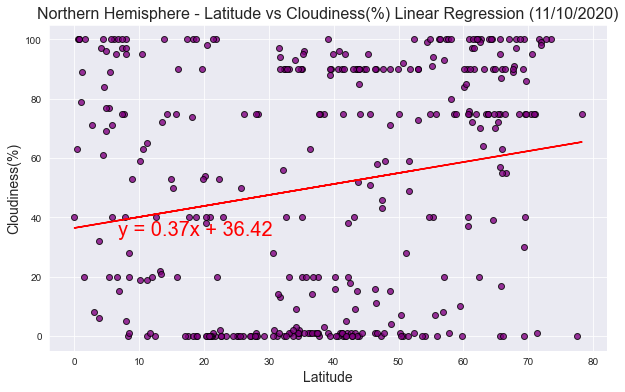

In [148]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("Images/Northern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

#### The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern_Hemisphere cities. The result from the data showed that there is a week positive correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is : 0.32
The r-squared is: 0.1


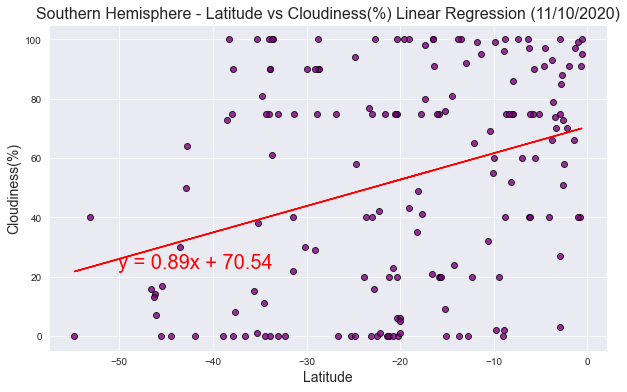

In [149]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("Images/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

#### The above plot is a linear regression model between Cloudiness (%) and for Southern Hemisphere cities. The result from the data showed that there is a week positive correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.¶

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is : 0.15
The r-squared is: 0.02


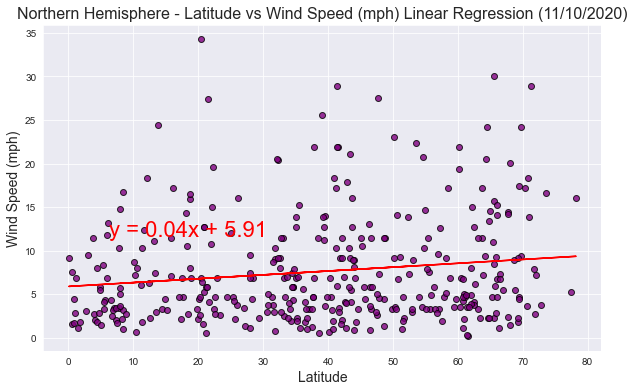

In [153]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("Images/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

#### The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern Hemisphere cities. The result from the data showed that there is a very week positive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is : -0.07
The r-squared is: 0.0


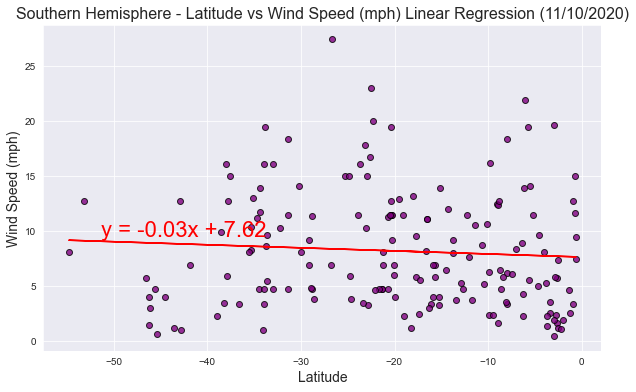

In [174]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25))
plt.savefig("Images/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

#### The above plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data showed that there is a very week negative correlation between Wind Speed (mph (%) and Latitude in the Southern Hemisphere cities.